
# TxMM Assignment 3: Information Extraction
## Learning goals of this assignment:
1. Become familiar with the intricacies and challenges of time expression labelling
2. Practice with manual annotation using BIO tags
3. Learn how to compute inter-annotator agreement scores with Cohen’s kappa, and understand how to interpret these kappa scores
4. Define a set of patterns for extracting time patterns from text
5. Calculate precision for the output of your code on an unseen text
6. Gain insight into the importance of pattern generalizability
7. Reflect on the gap between labeling time expressions and the actual IE task of extracting and matching events from texts.

## Group Assignment

This assignment is a group assignment. For this assignment, ensure you are enrolled in an "Assignment 3 - Information Extraction" group on Brightspace with a group of three people.


## Practical information

Note that the assignment will be graded with a Pass/Fail system.

Whenever you have any questions, feel free to ask us in the open lunch hours on Mondays! You can also contact the TAs, Ellen Jansen and Heleen Visserman, through discord or by sending a mail to Heleen (heleen.visserman@ru.nl).

We would appreciate it if you do not contact us via WhatsApp for non-urgent matters, so we can keep our TA work and private life (somewhat) separate.

We only support the use of [Google Colab](https://https://colab.research.google.com/) as all assignments have been implemented and tested using this. In case of (strange) bugs on other platforms, please consider switching to Colab to make sure that we can provide with all the help you may need.

## Handing in the assignment:
Please hand in the following files:
- This notebook containing your answers in a .ipynb format.
- One .csv file containing all three of your BIO-tag annotations.

Please run the notebook before you hand in the assignment.

Only one of the group members has to hand in the assignment files on Brightspace.

# The Assignment


This assignment consists of two parts: the first part focuses on textual annotation of time expressions and the second part focuses on automatizing time expression extraction with regular expressions and normalizing them to a unified format.

The goal of this assignment is to let you practice in annotation labeling and reflect on the challenges when doing manual annotation of time expressions in text.

Recognizing time expressions is a crucial part of many NLP and IE applications. In this assignment we focus on date expressions in biography texts from Wikipedia.

### Installation
First, make sure pandas, plotly and nltk are installed:

In [1]:
!pip install numpy
!pip install pandas

# Part 1 - Manual Annotation & Inter-Annotator agreement

### Uploading files to Colab

Similar to a previous assignment you need to upload some files that are needed for the assignment in the working directory. For this assignment you need to upload the files *Timnit_Gebru_bio_trainset.txt*,  *Geoffrey_Hinton_bio_devset.txt*,
*Yoshua_Bengio_bio_testset.txt* and *utils.py*.

Instead of using the upload functionality, you can also download the file directly in the notebook. Therefore you need to upload the files to https://transfer.sh/ then run the following command in a code cell using the URLs you created:

```
!wget <transfer.sh url>/Timnit_Gebru_bio_trainset.txt
!wget <transfer.sh url>/Geoffrey_Hinton_bio_devset.txt
!wget <transfer.sh url>/Yoshua_Bengio_bio_testset.txt
!wget <transfer.sh url>/utils.py
```

Pay attention: The links expire after two weeks and you have to create new ones.

Note that it is not at all important that you achieve and report a high Cohen's kappa for this task. In a real text mining application, researchers often go through multiple cycles of annotation rounds to come up with consistent and clear annotation guidelines. Here you are starting with an initial round of annotations.


### Task 1: Perform Manual Annotation
Each of you individually annotates the date expressions in the biography text of Timnit Gebru taken from Wikipedia without discussing the task together. This results in 3 versions (A,B,C) of the text with annotations.

A **date expression** is a sequence within the text (can contain letters, numbers, and/or punctuation) that expresses a point in time or a period of time.

As annotation labels we use the B (begin), I (inside) and O (outside) labels to indicate if a token is part of a time expression or not.

We provide a text with one token per line as a starting point, you can find `Timnit_Gebru_bio_TPL.csv` in the provided zip file. We advise you to use Excel or another editor that allows you to save the resulting annotations as a CSV file.

*After you individually created your annotated versions, combine them into one annotation file. Hand in the file together with this notebook on Brightspace.*

### Task 2: Compute Inter-Annotator Agreement
Upload the csv file and compute Cohen’s kappa between each pair of annotations (AB,BC,AC) and report the 3 scores. Use sklearn.metrics.cohen_kappa_score for this computation.

In [2]:
from sklearn.metrics import cohen_kappa_score
### BEGIN SOLUTION
import pandas as pd
### END SOLUTION


### BEGIN SOLUTION
df = pd.read_csv("TxMM_A3-IE_31_s1101750_s1080742_annotations.csv", sep="\t")
print(cohen_kappa_score(df.janneke, df.daan))
print(cohen_kappa_score(df.janneke, df.mats))
print(cohen_kappa_score(df.mats, df.daan))
### END SOLUTION

1.0
0.9590737657571948
0.9590737657571948


1.0 (Janneke & Daan)
0.9590737657571948 (Janneke & Mats)
0.9590737657571948 (Mats & Daan)

Because our group consists of two people, we asked Mats Robben (s1054883) for his annotation as well. He is also in a group of two people, so we provided them Janneke's annotation.

### Task 3: Reflect on the Cohen's Kappa score:
#### 3.1) How do you interpret the kappa scores? Are all 3 scores similar?  What does a high score indicate?

#### 3.2) If you place the three columns of BIO tags next to each other, what are the cases where you disagreed? Can you explain why?

#### 3.3) Was the Kappa score metric suitable to evaluate the inter-annotator agreement on this task of time expression labeling?


3.1) How do you interpret the kappa scores? Are all 3 scores similar?  What does a high score indicate? \
What we conclude from the Cohen's kappa values is that Janneke and Daan happened to annotate the exact same date expressions. Because these are the same, the value for both annotation when compared to Mats' annotation is the same. Mats has a slightly different annotation, but the value is still close to 1, so it is very similar.
A high score (close to 1) indicates that the two sets of annotations are very similar.

3.2) If you place the three columns of BIO tags next to each other, what are the cases where you disagreed? Can you explain why? \
summer	B	B	O
of  	I	I	O
2017	I	I	B
Mats apparently did not agree that "summer" is a time expression. Janneke and Daan do not agree, because although summer is not very specific, it definitely descibes a certain part of 2017.
This is the only case we disagreed on.

3.3) Was the Kappa score metric suitable to evaluate the inter-annotator agreement on this task of time expression labeling? \
Here, the annotation of the time expressions are quite rare compared to the other words in the text. This presence of correct annotation of the other words is not very important. It might be better to pay more attention to the B and I labels, or the scores at the positions in/around the time expressions.

# Part 2 - Regular Expressions and Normalization

## Extracting timelines and matching events from biographies
### Loading & inspecting the Geoffrey_Hinton_bio_devset.txt

In this second part you implement a IE program that automatically extracts time expresssions from texts. We focus here on events described in two texts (the biographies of Geoffrey Hinton and Yoshua Bengio) and you will find the matching events (i.e. overlapping dates) of the two timelines.

Here, your goal is to identify and extract date expressions from sentences.

First, you want to get an impression of the date expressions in the biography of Geoffrey Hinton.
Run the next cell to see Geoffrey_Hinton_bio_devset.txt. *Don't look at Yoshua_Bengio_bio_testset.txt, an extraction of the biography of Yoshua Bengio yet!*

In [3]:
import os
# Make sure Geoffrey_Hinton_bio_devset.txt and Yoshua_Bengio_bio_testset.txt are in the working directory.

def read_file(file_name):
  with open(file_name, "r") as f:
    return f.read()

working_dir = os.getcwd()  # get our working directory
train_file_path = os.path.join(working_dir, 'Geoffrey_Hinton_bio_devset.txt')
test_file_path = os.path.join(working_dir, 'Yoshua_Bengio_bio_testset.txt')

text_geoffrey = read_file(train_file_path)
print(text_geoffrey)


Geoffrey Everest Hinton (born 6 December 1947) is a British-Canadian cognitive psychologist and computer scientist, most noted for his work on artificial neural networks. From 2013 to 2023, he divided his time working for Google (Google Brain) and the University of Toronto, before publicly announcing his departure from Google in May 2023 citing concerns about the risks of artificial intelligence (AI) technology. In 2017, he co-founded and became the chief scientific advisor of the Vector Institute in Toronto.

With David Rumelhart and Ronald J. Williams, Hinton was co-author of a highly cited paper published in 1986 that popularised the backpropagation algorithm for training multi-layer neural networks, although they were not the first to propose the approach. Hinton is viewed as a leading figure in the deep learning community. The dramatic image-recognition milestone of the AlexNet designed in collaboration with his students Alex Krizhevsky and Ilya Sutskever for the ImageNet challeng

#### Task 1: Examine the biography of Geoffrey Hinton, and notice the patterns in which the date expressions occur. List and describe your observations in the next cell.

Dates are described like : 
- Day (as number) month year (as number, 4 numbers long)
- Only a year (as number, 4 numbers long)
- Time frame (year as number - year as number)
- Month and year (year as number)

#### Task 2: Implement the function *sentence_tokenize_text* so that it splits a text into a list of sentences.

*Note: we split the assignment in two parts as the first part used a word-per-line format, while in this second part we look at sentence-per-line.*

In [4]:
### BEGIN SOLUTION
import re
### END SOLUTION

def sentence_tokenize_text(text):
    """
    :param text: An input text, i.e. a string
    :return: A list of strings, where each string is one sentence
    """
    ### BEGIN SOLUTION
    return re.findall(r'[^\n ][^.?!]*[.?!]', text)
    ### END SOLUTION

# sentence_tokenize_text(text_geoffrey)  # You can display the result for testing.

#### Task 3: Implement the function *extract_date_expressions* so that it extracts date expressions from sentences.
**To ensure unbiased annotation of the test data in task 9, only one person of your group will annotate the test data. This person cannot look at the regex that is being developed in this task. The other two can develop the regex together.**

The function should take in our list of sentences and return a pandas DataFrame. This DataFrame has two columns:
- Date: The extracted date expressions
- Sentence: The sentence from which a data expression was extracted

**Write your own patterns** and do not rely on libraries that automatically extract date expressions as learning about regular expressions is one of the learning objectives of the exercise.

Use the Geoffrey_Hinton_dev.txt and the manual annotation that you did on the biography of Timnit Gebru as inspiration for your regular expressions.

*Hint: Check out https://regexr.com/ for testing and refining the regular expressions you use to capture date expressions. It also has a handy cheat sheet you can use. *

*For coding newbies: You can contact the TAs to get a regex example function in Python.*

In [5]:
### BEGIN SOLUTION
import pandas as pd
### END SOLUTION

def extract_date_expressions(sentences):
    """
    :param sentences: A list of strings, where each string is one sentence
    :return: A pandas DataFrame with the columns
                "Date" (extracted date expressions as a string)
                "Sentence" (sentences from which a date expression was extracted)
    """
    ### BEGIN SOLUTION
    solution = pd.DataFrame(columns = ["Dates", "Sentence"])
    for sentence in sentences:
        matches = re.findall(r'(?:(?:(?P<day>[0-9]{1,2})? (?P<month>January|February|March|April|May|June|July|August|September|October|November|December))? (?P<year>[0-9]{4}))', sentence)
        for match in matches:
            solution.loc[len(solution)] = [" ".join(match).strip(), sentence]
    return solution

# Apply the function to the tokenized text:
df_dates_geoffrey =  extract_date_expressions(sentence_tokenize_text(text_geoffrey))
df_dates_geoffrey # use this for testing

,Dates,Sentence
0,6 December 1947,Geoffrey Everest Hinton (born 6 December 1947)...
1,2013,"From 2013 to 2023, he divided his time working..."
2,2023,"From 2013 to 2023, he divided his time working..."
3,May 2023,"From 2013 to 2023, he divided his time working..."
4,2017,"In 2017, he co-founded and became the chief sc..."
5,1986,"Williams, Hinton was co-author of a highly cit..."
6,2012,The dramatic image-recognition milestone of th...
7,2018,Hinton received the 2018 Turing Award (often r...
8,May 2023,"In May 2023, Hinton announced his resignation ..."
9,1970,After repeatedly changing his degree between d...


#### Task 4: Normalization: Implement the function *dates_to_iso8601* so that it converts a date expression string to the ISO 8601 date standard.
Then, add the ISO 8601 converted dates as a column ("ISO") to our dataframe.

You can find more info and examples on https://www.iso.org/iso-8601-date-and-time-format.html.

To implement the function check out Python’s inbuilt datetime module. you’ll find functions in there that can make this task a lot easier.

In [6]:
from datetime import datetime

def date_expression_to_iso8601(date_string):
    """
    :param date_string: A string containing a date expression
    :return: A string containing the date in ISO 8601 format
    """
    match = re.search(r'^(?P<day>[0-9]{1,2})?[ ]?(?P<month>[A-z]+)?[ ]?(?P<year>[0-9]{4})?$', date_string)
    day, month, year = match.group("day"), match.group("month"), match.group("year")
    day = "0"*(2-len(day)) + day if day else ""
    month = month if month else ""
    year = year if year else ""
    
    if month != "":
        datetime_object = datetime.strptime(month[:3], "%b")
        month = str(datetime_object.month) if datetime_object.month >= 10 else f"0{datetime_object.month}"
    try:
        return pd.to_datetime(f"{year}-{month}-{day}".strip("-"))
    except:
        print(f"{year}-{month}-{day}".strip("-"))
        return "AAA"

# Now, add a column "ISO" to your DataFrame
### BEGIN SOLUTION
df_dates_geoffrey.index = df_dates_geoffrey["Dates"].map(date_expression_to_iso8601)
df_dates_geoffrey.index.name = "ISO"
df_dates_geoffrey = df_dates_geoffrey.sort_index()
### END SOLUTION
df_dates_geoffrey  # use this for testing

,Dates,Sentence
ISO,,
1947-12-06,6 December 1947,Geoffrey Everest Hinton (born 6 December 1947)...
1970-01-01,1970,After repeatedly changing his degree between d...
1978-01-01,1978,He continued his study at the University of Ed...
1986-01-01,1986,"Williams, Hinton was co-author of a highly cit..."
1992-09-01,September 1992,An accessible introduction to Geoffrey Hinton'...
1993-10-01,October 1993,An accessible introduction to Geoffrey Hinton'...
2007-01-01,2007,"In 2007, Hinton coauthored an unsupervised lea..."
2012-01-01,2012,The dramatic image-recognition milestone of th...
2013-01-01,2013,"From 2013 to 2023, he divided his time working..."


#### Task 5: In which respect does the ISO 8601 format defer from the date information present in the text? (If you noticed an additional issue caused by a discrepancy between the standard and the Python implementation please mention this as well.)

Janneke: The ISO format requires a day, month and year, however, these are often not all present in the text. This makes it harder to translate all of the date information to ISO format. Also, including just a month in a date format is not allowed, so I had to ignore these, while I originally added them to the regex.

#### Task 6: Combine the previous steps in the function *get_sorted_df_from_file_name* so that it runs the whole date extraction pipeline and returns a DataFrame.
**Make sure to order the DataFrame rows chronologically according to the ISO dates!**

Consider the following example text:

> This is an example text about interesting upcoming dates. Halloween takes place on 31 October 2021. Our Christmas holiday is from Friday 24 December 2021 - Friday 7 January 2022. We will celebrate Sinterklaas on 5 December 2021.

Here's an illustration of what the example text's DataFrame should look like:

|ISO |Date | Sentence |
|----:|----:|:----|
|2021-10-31 |31 October 2021| Halloween takes place on 31 October 2021.|
|2021-12-05 |5 December 2021| We will celebrate Sinterklaas on 5 December 2021.|
|2021-12-24 |24 December 2021| Our Christmas holiday is from Friday 24 December 2021 - Friday 7 January 2022.|
|2022-01-07 |7 January 2022| Our Christmas holiday is from Friday 24 December 2021 - Friday 7 January 2022.|

In [7]:
def get_sorted_df_from_file_name(file_name):
    """
    :param file_name: A string containing the full path to a file
    :return: A pandas DataFrame with the columns "Date", "Sentence" and "ISO"
          (see above), where rows are sorted according to "ISO"
    """
    ### BEGIN SOLUTION
    # Extract dates, then sort by ISO
    text = read_file(file_name)
    tokenized_text = sentence_tokenize_text(text)
    df_dates =  extract_date_expressions(tokenized_text)
    df_dates.index = df_dates["Dates"].map(date_expression_to_iso8601)
    df_dates.index.name = "ISO"
    df_dates = df_dates.sort_index()
    return df_dates
    ### END SOLUTION

get_sorted_df_from_file_name(train_file_path)

,Dates,Sentence
ISO,,
1947-12-06,6 December 1947,Geoffrey Everest Hinton (born 6 December 1947)...
1970-01-01,1970,After repeatedly changing his degree between d...
1978-01-01,1978,He continued his study at the University of Ed...
1986-01-01,1986,"Williams, Hinton was co-author of a highly cit..."
1992-09-01,September 1992,An accessible introduction to Geoffrey Hinton'...
1993-10-01,October 1993,An accessible introduction to Geoffrey Hinton'...
2007-01-01,2007,"In 2007, Hinton coauthored an unsupervised lea..."
2012-01-01,2012,The dramatic image-recognition milestone of th...
2013-01-01,2013,"From 2013 to 2023, he divided his time working..."


### Manual labeling: Geoffrey_Hinton_bio_devset.txt
To evaluate your date expression pipeline, you first need to have gold labels. For Part 2 we use another labeling format to simplify the regex matching. Let's familiarize ourselves with this format.

Look at our example text again:

> This is an example text about interesting upcoming dates. Halloween takes place on 31 October 2021. Our Christmas holiday is from Friday 24 December 2021 - Friday 7 January 2022. We will celebrate Sinterklaas on 5 December 2021.


This is how we store the gold labels for this example text:
~~~python
example_manual_labels = [
  {"Dates": [],
    "Sentence": "This is an example text about interesting upcoming dates."},
  {"Dates": ["2021-10-31"],
    "Sentence": "The next Halloween takes place on 31 October 2021."},
  {"Dates": ["2021-12-24", "2022-01-07"],
    "Sentence": "Our Christmas holiday is from Friday 24 December 2021-Friday 7 January 2022."},
  {"Dates": ["2021-12-05"],
    "Sentence": "We will celebrate Sinterklaas on 5 December 2021."}
  ]
~~~

As you can see, we use a list of dictionaries. We have one dictionary for each sentence. This dictionary has two keys:
- Key "Sentence": The corresponding value is the sentence (i.e. a string).
- Key "Dates": The corresponding value is a list of all date expressions (strings; correctly converted to the ISO 8601 date standard) that appear in that sentence. If a sentence does not contain any date expressions, this list is empty.


We've created a helper function that automatially provides a template list based on *your sentence_tokenize_text* function. Run the cell below to get this template for *text_geoffrey*:

In [8]:
def get_manual_labeling_list(text):
  """
  A helper function to print a manual labeling list in which you only have to
  fill in the dates for each sentence.
  :param text: An input text, i.e. a string
  """
  tokenized_text = sentence_tokenize_text(text)
  return [{"Dates": [], "Sentence": tokenized_text[i]} for i in range(len(tokenized_text))]

get_manual_labeling_list(text_geoffrey)

[{'Dates': [],
  'Sentence': 'Geoffrey Everest Hinton (born 6 December 1947) is a British-Canadian cognitive psychologist and computer scientist, most noted for his work on artificial neural networks.'},
 {'Dates': [],
  'Sentence': 'From 2013 to 2023, he divided his time working for Google (Google Brain) and the University of Toronto, before publicly announcing his departure from Google in May 2023 citing concerns about the risks of artificial intelligence (AI) technology.'},
 {'Dates': [],
  'Sentence': 'In 2017, he co-founded and became the chief scientific advisor of the Vector Institute in Toronto.'},
 {'Dates': [], 'Sentence': 'With David Rumelhart and Ronald J.'},
 {'Dates': [],
  'Sentence': 'Williams, Hinton was co-author of a highly cited paper published in 1986 that popularised the backpropagation algorithm for training multi-layer neural networks, although they were not the first to propose the approach.'},
 {'Dates': [],
  'Sentence': 'Hinton is viewed as a leading figure 

#### Task 7: Manually label all sentences from Geoffrey_Hinton_bio_devset.txt.   
Copy the template list output by our helper function for Geoffrey_Hinton_bio_devset.txt into the cell below. Then manually fill the list *geoffrey_manual_labels* with the dates (in correct ISO 8601 format) from each sentence.

In [9]:
geoffrey_manual_labels = [
  {'Dates': ["1947-12-06"],
  'Sentence': 'Geoffrey Everest Hinton (born 6 December 1947) is a British-Canadian cognitive psychologist and computer scientist, most noted for his work on artificial neural networks.'},
 {'Dates': ["2013", "2023", "2023-05"],
  'Sentence': 'From 2013 to 2023, he divided his time working for Google (Google Brain) and the University of Toronto, before publicly announcing his departure from Google in May 2023 citing concerns about the risks of artificial intelligence (AI) technology.'},
 {'Dates': ["2017"],
  'Sentence': 'In 2017, he co-founded and became the chief scientific advisor of the Vector Institute in Toronto.'},
 {'Dates': [], 
  'Sentence': 'With David Rumelhart and Ronald J.'},
 {'Dates': ["1986"],
  'Sentence': 'Williams, Hinton was co-author of a highly cited paper published in 1986 that popularised the backpropagation algorithm for training multi-layer neural networks, although they were not the first to propose the approach.'},
 {'Dates': [],
  'Sentence': 'Hinton is viewed as a leading figure in the deep learning community.'},
 {'Dates': ["2012"],
  'Sentence': 'The dramatic image-recognition milestone of the AlexNet designed in collaboration with his students Alex Krizhevsky and Ilya Sutskever for the ImageNet challenge 2012 was a breakthrough in the field of computer vision.'},
 {'Dates': ["2018"],
  'Sentence': 'Hinton received the 2018 Turing Award (often referred to as the "Nobel Prize of Computing"), together with Yoshua Bengio and Yann LeCun, for their work on deep learning.'},
 {'Dates': [],
  'Sentence': 'They are sometimes referred to as the "Godfathers of Deep Learning", and have continued to give public talks together.'},
 {'Dates': ["2023-05"],
  'Sentence': 'In May 2023, Hinton announced his resignation from Google to be able to "freely speak out about the risks of A.'},
 {'Dates': [],
  'Sentence': 'He has voiced concerns about deliberate misuse by malicious actors, technological unemployment, and existential risk from artificial general intelligence.'},
 {'Dates': [], 
  'Sentence': "Hinton was educated at King's College, Cambridge."},
 {'Dates': ["1970"],
  'Sentence': 'After repeatedly changing his degree between different subjects like natural sciences, history of art, and philosophy, he eventually graduated in 1970 with a bachelor of arts in experimental psychology.'},
 {'Dates': ["1978"],
  'Sentence': 'He continued his study at the University of Edinburgh where he was awarded a PhD in artificial intelligence in 1978 for research supervised by Christopher Longuet-Higgins.'},
 {'Dates': [],
  'Sentence': "Hinton's research concerns ways of using neural networks for machine learning, memory, perception, and symbol processing."},
 {'Dates': [],
  'Sentence': 'He has written or co-written more than 200 peer reviewed publications.'},
 {'Dates': [],
  'Sentence': 'Hinton co-invented Boltzmann machines with David Ackley and Terry Sejnowski.'},
 {'Dates': [],
  'Sentence': 'His other contributions to neural network research include distributed representations, time delay neural network, mixtures of experts, Helmholtz machines and Product of Experts.'},
 {'Dates': ["2007"],
  'Sentence': 'In 2007, Hinton coauthored an unsupervised learning paper titled Unsupervised learning of image transformations.'},
 {'Dates': ["1992-09", "1993-10"],
  'Sentence': "An accessible introduction to Geoffrey Hinton's research can be found in his articles in Scientific American in September 1992 and October 1993."},
 {'Dates': [], 
  'Sentence': 'Text from https://en.'},
 {'Dates': [], 
  'Sentence': 'wikipedia.'},
 {'Dates': [],
  'Sentence': 'org/wiki/Geoffrey_Hinton, adapted by the teaching team.'}]




Now that we have labels for Geoffrey_Hinton_bio_devset.txt, we can plot a confusion matrix to get an impression of your extraction procedure's performance:

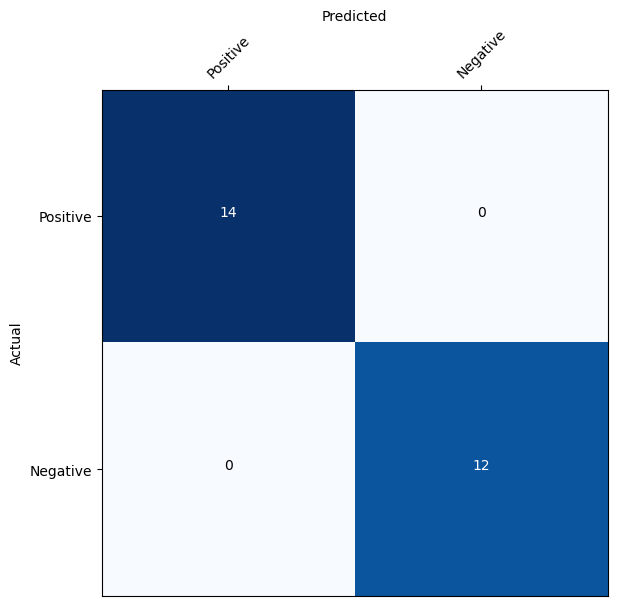

In [10]:
from utils import plot_confusion_matrix

plot_confusion_matrix(manual_labels = geoffrey_manual_labels,
                      sorted_date_df = get_sorted_df_from_file_name(train_file_path),
                      normalize    = False,
                      title_names = ['Positive','Negative'])

#### Task 8.1: Manually calculate the precision and recall of your date expression procedure on Geoffrey_Hinton_bio_devset.txt.
Write your calculation into the cell below. Write your *full* calculation including the formula you are using.

Hint: You can use $\LaTeX$ here.
- To display a formula inline, surround it by the '\$' sign.
    - For example, '\$ 4=2^2 \$' will be displayed like this: $4=2^2$
- To display a formula in a block, surround it by '\$\$'.
    - For example, '\$\$ 16=4^2 \$\$' will be displayed like this: $$16=4^2$$

Precision = $\frac{TP}{TP+FP}$ \
Recall = $\frac{TP}{TP+FN}$ \
\
Precision = $\frac{13}{13+0} = \frac{13}{13} = 1$ \
Recall = $\frac{13}{13+0} = \frac{13}{13} = 1 $

**Now, repeat the following steps until you are satisfied with the performance:**
1. Run the date expression procedure on Geoffrey_Hinton_bio_devset.txt.
2. Make adaptations to your code if necessary.
3. Go through the output manually and calculate precision and recall. **Make sure the cell above contains the latest calculation.**

Once you are satisfied with your performance, proceed to the next part of this assignment.

#### Task 8.2: Discuss the difficulties you encountered during each repeat of the above steps to develop the time patterns.  ####

Splitting sentences is quite hard, as "." can exist in a sentence without this marking the end of a sentence.

### Applying the extraction procedure to the unseen Yoshua_Bengio_bio_testset.txt
Next, we will test your date extraction procedure and see how it performs on the unseen file Yoshua_Bengio_bio_testset.txt. First, let's have a look at the text inside this file:

In [11]:
text_yoshua = read_file(test_file_path)
print(text_yoshua)

Yoshua Bengio OC FRS FRSC (born March 5, 1964]) is a Canadian computer scientist, most noted for his work on artificial neural networks and deep learning. He is a professor at the Department of Computer Science and Operations Research at the Université de Montréal and scientific director of the Montreal Institute for Learning Algorithms (MILA).

Bengio received the 2018 ACM A.M. Turing Award (often referred to as the "Nobel Prize of Computing"), together with Geoffrey Hinton and Yann LeCun, for their work on deep learning. Bengio, Hinton, and LeCun, are sometimes referred to as the "Godfathers of AI" and "Godfathers of Deep Learning". As of May 2023, he is the most cited computer scientist by h-index.

Bengio was born in France to a Jewish family who immigrated to France from Morocco, and then immigrated again to Canada. He received his Bachelor of Science degree (electrical engineering), MSc (computer science) and PhD (computer science) from McGill University.

The Bengio brothers liv

#### Task 9: Manually label all sentences from Yoshua_Bengio_bio_testset.txt
**The one person that didn't work on the regex has to be the person to annotate the test file**

The following cell gives you the template list.
Fill the list *Yoshua_manual_labels* (just like you previously did for Geoffrey_Hinton_bio_devset.txt) in the cell under the following one with the dates from the text.

In [12]:
get_manual_labeling_list(text_yoshua)

[{'Dates': [],
  'Sentence': 'Yoshua Bengio OC FRS FRSC (born March 5, 1964]) is a Canadian computer scientist, most noted for his work on artificial neural networks and deep learning.'},
 {'Dates': [],
  'Sentence': 'He is a professor at the Department of Computer Science and Operations Research at the Université de Montréal and scientific director of the Montreal Institute for Learning Algorithms (MILA).'},
 {'Dates': [], 'Sentence': 'Bengio received the 2018 ACM A.'},
 {'Dates': [], 'Sentence': 'M.'},
 {'Dates': [],
  'Sentence': 'Turing Award (often referred to as the "Nobel Prize of Computing"), together with Geoffrey Hinton and Yann LeCun, for their work on deep learning.'},
 {'Dates': [],
  'Sentence': 'Bengio, Hinton, and LeCun, are sometimes referred to as the "Godfathers of AI" and "Godfathers of Deep Learning".'},
 {'Dates': [],
  'Sentence': 'As of May 2023, he is the most cited computer scientist by h-index.'},
 {'Dates': [],
  'Sentence': 'Bengio was born in France to a J

In [36]:
yoshua_manual_labels = [
{'Dates': ["1964-03-05"],
  'Sentence': 'Yoshua Bengio OC FRS FRSC (born March 5, 1964]) is a Canadian computer scientist, most noted for his work on artificial neural networks and deep learning.'},
 {'Dates': [],
  'Sentence': 'He is a professor at the Department of Computer Science and Operations Research at the UniversitÃ© de MontrÃ©al and scientific director of the Montreal Institute for Learning Algorithms (MILA).'},
 {'Dates': ["2018"], 
  'Sentence': 'Bengio received the 2018 ACM A.'},
 {'Dates': [], 
  'Sentence': 'M.'},
 {'Dates': [],
  'Sentence': 'Turing Award (often referred to as the "Nobel Prize of Computing"), together with Geoffrey Hinton and Yann LeCun, for their work on deep learning.'},
 {'Dates': [],
  'Sentence': 'Bengio, Hinton, and LeCun, are sometimes referred to as the "Godfathers of AI" and "Godfathers of Deep Learning".'},
 {'Dates': ["2023-05"],
  'Sentence': 'As of May 2023, he is the most cited computer scientist by h-index.'},
 {'Dates': [],
  'Sentence': 'Bengio was born in France to a Jewish family who immigrated to France from Morocco, and then immigrated again to Canada.'},
 {'Dates': [],
  'Sentence': 'He received his Bachelor of Science degree (electrical engineering), MSc (computer science) and PhD (computer science) from McGill University.'},
 {'Dates': [],
  'Sentence': "The Bengio brothers lived in Morocco for a year during their father's military service there."},
 {'Dates': [],
  'Sentence': 'His father, Carlo Bengio, was a pharmacist who wrote theatre pieces and ran a Sephardic theatrical troupe in Montreal that played Judeo-Arabic pieces.'},
 {'Dates': [],
  'Sentence': 'His mother, CÃ©lia Moreno, is also an artist who played in one of the major theatre scenes of Morocco that was run by Tayeb Seddiki in the 1970s.'},
 {'Dates': [], 
  'Sentence': 'Career and research.'},
 {'Dates': [],
  'Sentence': 'After his PhD, Bengio was a postdoctoral fellow at MIT (supervised by Michael I.'},
 {'Dates': [], 
  'Sentence': 'Jordan) and AT&T Bell Labs.'},
 {'Dates': ["1993"],
  'Sentence': 'Bengio has been a faculty member at the Université de Montréal since 1993 and is co-director of the Learning in Machines & Brains program at the Canadian Institute for Advanced Research.'},
 {'Dates': [],
  'Sentence': 'Along with Geoffrey Hinton and Yann LeCun, Bengio is considered by Cade Metz as one of the three people most responsible for the advancement of deep learning during the 1990s and 2000s.'},
 {'Dates': ["2018"],
  'Sentence': 'Among the computer scientists with an h-index of at least 100, Bengio was as of 2018 the one with the most recent citations per day, according to MILA.'},
 {'Dates': ["2022-12"],
  'Sentence': 'As of December 2022, he had the 2nd highest Discipline H-index (D-index) in computer science.'},
 {'Dates': ["2019"],
  'Sentence': 'Thanks to a 2019 article on a novel RNN architecture, Bengio has an Erdős number of 3.'},
 {'Dates': [], 'Sentence': 
   'Views on AI.'},
 {'Dates': ["2023-05"],
  'Sentence': 'Following concerns raised by AI experts about the existential risks AI poses on humanity, in May 2023, Bengio stated in an interview to BBC that he felt "lost" over his life\'s work.'},
 {'Dates': [],
  'Sentence': 'He raised his concern about "bad actors" getting hold of AI, especially as it becomes more sophisticated and powerful.'},
 {'Dates': [],
  'Sentence': 'He called for better regulation, product registration, ethical training, and more involvement from governments in tracking and auditing AI products.'},
 {'Dates': ["2023-05"],
  'Sentence': 'Speaking with the Financial Times also in May 2023, Bengio said that he supported the monitoring of access to AI systems such as ChatGPT so that potentially illegal or dangerous uses could be tracked.'},
 {'Dates': [], 
  'Sentence': 'Awards and honours.'},
 {'Dates': ["2017"],
  'Sentence': 'In 2017, Bengio was named an Officer of the Order of Canada.'},
 {'Dates': [],
  'Sentence': 'The same year, he was nominated Fellow of the Royal Society of Canada and received the Marie-Victorin Quebec Prize.'},
 {'Dates': ["2018"],
  'Sentence': 'Together with Geoffrey Hinton and Yann LeCun, Bengio won the 2018 Turing Award.'},
 {'Dates': ["2020"],
  'Sentence': 'In 2020 he was elected a Fellow of the Royal Society.'},
 {'Dates': ["2022"],
  'Sentence': 'In 2022 he received the Princess of Asturias Award in the category "Scientific Research" with his peers Yann LeCun, Geoffrey Hinton and Demis Hassabis.'},
 {'Dates': ["2023"],
  'Sentence': "In 2023 Bengio was appointed Knight of the Legion of Honour, France's highest order of merit."},
 {'Dates': [], 'Sentence': 'Text from https://en.'},
 {'Dates': [], 'Sentence': 'wikipedia.'},
 {'Dates': [],
  'Sentence': 'org/wiki/Yoshua_Bengio, adapted by the teaching team.'}
]

**Now, let's run your date expression procedure on the unseen text *Yoshua_Bengio_bio_testset.txt* and look at the resulting DataFrame.**


In [37]:
get_sorted_df_from_file_name(test_file_path)

,Dates,Sentence
ISO,,
1964-01-01,1964,"Yoshua Bengio OC FRS FRSC (born March 5, 1964]..."
1970-01-01,1970,"His mother, Célia Moreno, is also an artist wh..."
1990-01-01,1990,"Along with Geoffrey Hinton and Yann LeCun, Ben..."
1993-01-01,1993,Bengio has been a faculty member at the Univer...
2000-01-01,2000,"Along with Geoffrey Hinton and Yann LeCun, Ben..."
2017-01-01,2017,"In 2017, Bengio was named an Officer of the Or..."
2018-01-01,2018,Bengio received the 2018 ACM A.
2018-01-01,2018,Among the computer scientists with an h-index ...
2018-01-01,2018,"Together with Geoffrey Hinton and Yann LeCun, ..."


#### Task 10:  Make adaptations to your date extraction code if necessary. Do not change the functions from the previous part in this assignment, but make your adjustments by changing the three functions below.

Currently, each of these "adapted" functions just uses the functions from the previous parts. If you want to make any changes to one of the functions, overwrite this return statement with your changes.

In [38]:
def sentence_tokenize_text_adapted(text):
  """
  :param text: An input text, i.e. a string
  :return: A list of strings, where each string is one sentence
  """
  # change this if you want to adapt your original function
  return sentence_tokenize_text(text)


def extract_date_expressions_adapted(sentences):
  """
  :param sentences: A list of strings, where each string is one sentence
  :return: A pandas DataFrame with the columns
                "Date" (extracted date expressions as a string)
                "Sentence" (sentences from which a date expression was extracted)
  """
  # change this if you want to adapt your original function
  return extract_date_expressions(sentences)


def date_expression_to_iso8601_adapted(date_string):
  """
  :param date_string: A string containing a date expression
  :return: A string containing the date in ISO 8601 format
  """
  # change this if you want to adapt your original function
  return date_expression_to_iso8601(date_string)


def get_sorted_df_from_file_name_adapted(file_name):
  """
  :param file_name: A string containing the full path to a file
  :return: A pandas DataFrame with the columns "Date", "Sentence" and "ISO"
          (see above), where rows are sorted according to "ISO"
  """
  # change this if you want to adapt your original function
  return get_sorted_df_from_file_name(file_name)

#### Task 11: Discuss the difficulties you encountered extracting the new timeline. Also address the adaptations that you needed to make for processing the unseen biography Yoshua_Bengio_bio_testset.txt.

Write your discussion into the cell below.

There were no difficulties. All functions ran without errors. Therefore, we did not need to make any adaptions.

**Now, we can evaluate your adapted date expression procedure. Let's plot one confusion matrix for each of the text files. **

Confusion matrix for Geoffrey Hinton:


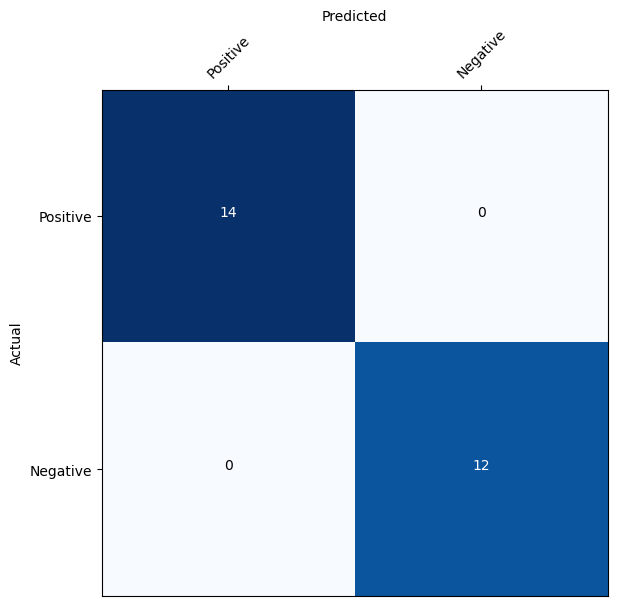

Confusion matrix for Yoshua Bengio:
FN: {'Dates': ['1964-03-05'], 'Sentence': 'Yoshua Bengio OC FRS FRSC (born March 5, 1964]) is a Canadian computer scientist, most noted for his work on artificial neural networks and deep learning.'}
FP: {'Dates': [], 'Sentence': 'Along with Geoffrey Hinton and Yann LeCun, Bengio is considered by Cade Metz as one of the three people most responsible for the advancement of deep learning during the 1990s and 2000s.'}


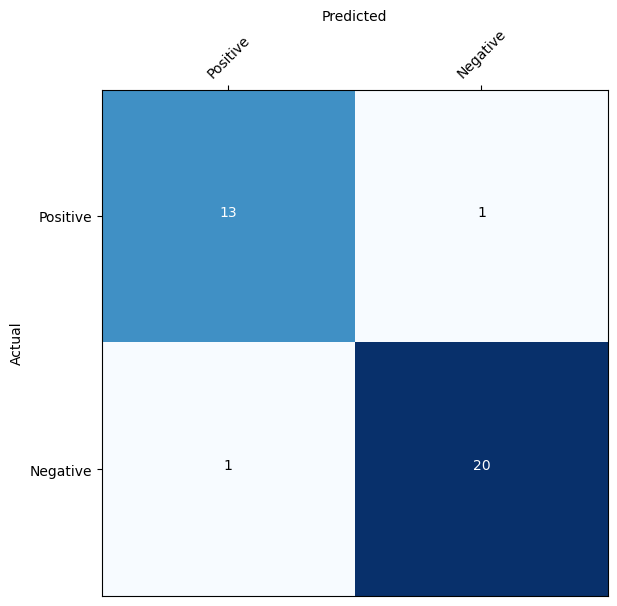

In [40]:
print('Confusion matrix for Geoffrey Hinton:')
plot_confusion_matrix(manual_labels = geoffrey_manual_labels,
                      sorted_date_df = get_sorted_df_from_file_name_adapted(train_file_path),
                      normalize    = False,
                      title_names = ['Positive','Negative'])

print('Confusion matrix for Yoshua Bengio:')
plot_confusion_matrix(manual_labels = yoshua_manual_labels,
                      sorted_date_df = get_sorted_df_from_file_name_adapted(test_file_path),
                      normalize    = False,
                      title_names = ['Positive','Negative'])

#### Task 12: Calculate the precision and recall of your adapted date expression procedure on both Geoffrey_Hinton_bio_devset.txt and Yoshua_Bengio_bio_testset.txt.

Write your calculations into the cell below.

Precision = $\frac{TP}{TP+FP}$ \
Recall = $\frac{TP}{TP+FN}$ \
\
Precision = $\frac{13}{13+1} = \frac{13}{12} = 0.929 $ \
Recall = $\frac{13}{13+1} = \frac{13}{12} = 0.929 $

#### Task 13: Compare the precision and recall scores on Geoffrey_Hinton_bio_devset.txt and Yoshua_Bengio_bio_testset.txt. Address the following points:
- Did the values of Geoffrey_Hinton_bio_devset.txt change after your adaptions?
- Are there any differences between the two texts?
- If so, where does this difference come from?
- What does this difference mean in terms of generalizability?

There were no adaptions.
Yes, there are differences. In the second text, there is a date that has the day, month and year in a different order, making it hard to extract this date.
It makes it hard to extract every possible date sequence based on a pattern, because dates can be described in many ways.

#### Task 14: Take a closer look at the errors your automatic extraction method makes. What is happening there?

False Negative: {'Dates': ['1964-03-05'], 'Sentence': 'Yoshua Bengio OC FRS FRSC (born March 5, 1964]) is a Canadian computer scientist, most noted for his work on artificial neural networks and deep learning.'}

Here, the date is in an order that the automatic extraction method did not expect. This causes the method not to recognise this date correctly.

False Positive: {'Dates': [], 'Sentence': 'Along with Geoffrey Hinton and Yann LeCun, Bengio is considered by Cade Metz as one of the three people most responsible for the advancement of deep learning during the 1990s and 2000s.'}

Here, the method recognized 1990 and 2000 as date expressions, but the manual labelling did not. This is because the manual labelling assumed that '1990s' and '2000s' did not refer to specific dates or periods, but to broad, general, prolonged periods of time, while the method recognized '1990' and '2000' as specific date expressions. This mismatch caused an error.

#### Task 15: Reflect on the relation between date mentions in the texts and the events that they denote, reflect on duration and overlap of events. (max. 4 sentences)

Some date expressions that only consist of a mentioned year are not necessarily an expression of a certain moment; they are part of the name of an event that occured, like the "2018 ACM A.M. Turing Award". Such a title implies that the event took place in 2018, but without further context isn't a definite confirmation, as it might have taken place at the end of 2017 or the beginning of 2019. Another type of date mentions in relation to events are (very) broad periods of time, like "[...] Bengio is considered [...] one of the three people most responsible for the advancement of deep learning during the 1990s and 2000s." Here, there is a mention of a period from the 1990s and 2000s, but this date expression is so broad and non-specific to a certain event, that it may be uncertain whether this is considered a date expression at all.

### Finding matching events
#### Task 16: Find the matching events (i.e. overlapping dates in the two biographical timelines) between the two timelines.

You could do this in one of the following ways:
- **Command line** We highly encourage you to use the ‘comm’ function on your ISO-8601 dates in your command line (more info and example: https://www.computerhope.com/unix/ucomm.htm. Note that this command also works on Mac OS/Windows).
- **Python** It is also allowed to find the matching events programmatically in Python.
- **Online tool ** You can use an online tool (e.g. https://text-compare.com/).

**Important: Do not search for matching events manually!**

Please put the command, the code or the link to the website you used into the cell below or briefly describe how you found the matching events.  

Then, also paste the list of matching events (in ISO-8601 format) into that cell.


The code is shown in the codeblock below

List: \
1970-01-01 \
2017-01-01 \
2018-01-01 \
2023-01-01 \
2023-05-01

In [45]:
train_df = get_sorted_df_from_file_name_adapted(train_file_path)
test_df = get_sorted_df_from_file_name_adapted(test_file_path)
list(train_df.index.intersection(test_df.index, sort=False))

[Timestamp('1970-01-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00')]

#### Task 17: Discussion of matching events
1. Discuss the list of matching events that you found.
2. When going through the texts manually, do you find matching events that you did not find programmatically/automatically?
3. If so, what could be the reason(s) for this? Discuss your answers to these questions and any other difficulties you encountered during the extraction of matching events.

1. We mostly found years, not full dates with month and days. This makes sense, because these are less unique. Mind that an expressin like 1970-01-01 means that we found only 1970. The pandas timestamp object adds the month and the day to this expression.
2. Manually, we found that the year 2018 in our list does not only occur in both texts, but it both relates to the 2018 Turing award.
3. The name of the award/event is required to recognise that this is more than an overlapping date. However, the expresions we extract only extracts the date and not the name of the event.


In [17]:
print('Congratulations! You finished this assignment!')
print('We would like to thank Theo Kent for letting us use his notebook as a basis for this assignment!')

Congratulations! You finished this assignment!
We would like to thank Theo Kent for letting us use his notebook as a basis for this assignment!


Please look at the ***Handing in the assignment*** section for instructions on what to hand in.